# 01-12 - Visualizing networks with `pathpyG`

*April 17 2024*

A key feature of `pathpy` is its support for custumizable interactive visualisations that can be embedded in jupyter notebooks or stored as stand-alone files. In the following, we show this functionality in some toy examples before moving to real data sets in the next unit. We first import `pathpy` as usual. 

In [1]:
import pathpyG as pp
import sqlite3 

## Interactive network visualisation in `jupyter`

We first create a simple toy example by adding two edges between three nodes.

In [25]:
n = pp.Graph.from_edge_list([('a', 'b'), ('b', 'c')])
print(n)

Directed graph with 3 nodes and 2 edges

Graph attributes
	num_nodes		<class 'int'>



Calling the `print` function on a network instance will generate a string representation that can be printed on the console. The simplest way to graphically visualise the network in a jupyter notebook is to call the `pp.plot` function on the network. This will create an interactive HTML visualisation of the network, where we can zoom, pan, and drag nodes (press Shift while panning, clicking, or using the mouse wheel). Try to zoom and pan the network (by holding the shift key and using the mouse/mouse wheel). Try what happens if you drag a node and release the mouse button.

In [26]:
pp.plot(n)

By default a default style is applied to the network but pathpy allows to fully style the network based on a custom style dictionary that can be passed to the plot function. If we want to change the color of nodes we can simply assign a `color` attribute to the nodes as follows:

In [32]:
plot_style = {
    'node_color':  ['red', 'orange', 'magenta'],
    'node_label': [x for x in n.mapping.node_ids]
}
pp.plot(n, **plot_style)

We can additionally change the size of the nodes as follows:

In [33]:
plot_style['node_size'] = 30

pp.plot(n, **plot_style)

Instead of an interactive HTML-based visualization in jupyter, we can also use matplotlib as a plotting backend. This will generate a matplotlib plot that shows the graph. This is convenient for very large graphs, for which an interactive visualization can be computationally prohibitive:

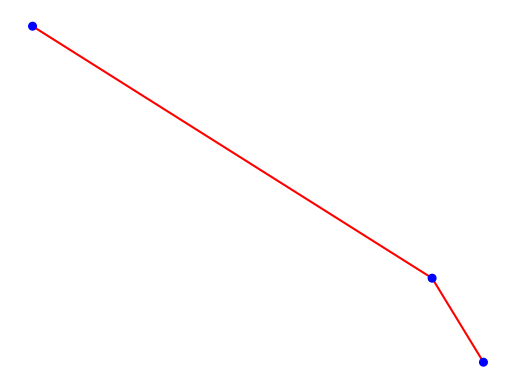

In [35]:
pp.plot(n, backend='matplotlib');

We can also pass a specific layout to the plot function of the network. This will disable the interactive layout, fixing the node positions to the precalculated layout:

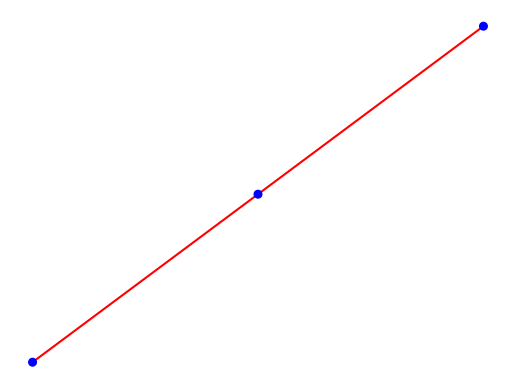

In [37]:
layout = {'a':[0,0],'b':[1,1],"c":[2,2]}
pp.plot(n, backend='matplotlib',layout=layout)

While it is convenient to interactively plot networks in a jupyter network, we often want to generate stand-alone visualisations that we can share or embed in other website. The plot function can be used to generate a stand-alone HTML visualisation of the network that can be opened in any browser and shared on the Web.

In [41]:
pp.plot(n, filename='test_plot.html')